<a href="https://colab.research.google.com/github/bhartimeena/Assingment/blob/main/Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

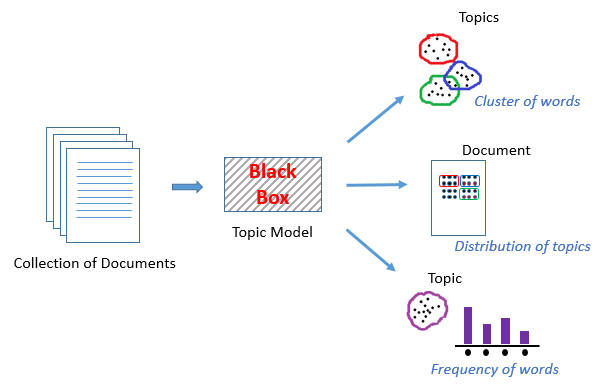

##SVD 


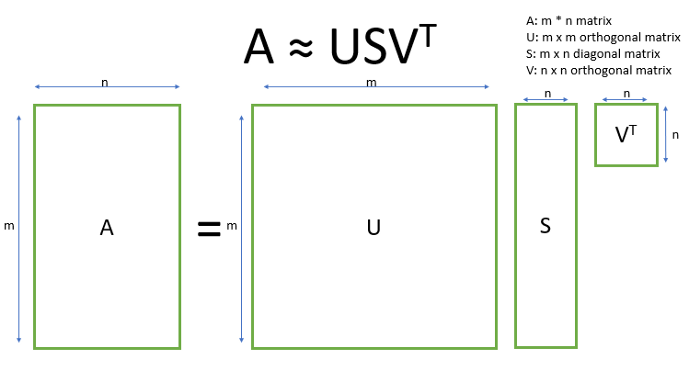

In [ ]:
import pandas as pd
import math
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from string import punctuation
import nltk
pi = math.pi

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')


In [ ]:
data=newsgroups_train['data']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:


inp = ['/content/drive/MyDrive/IR/LSI/Doc1.txt','/content/drive/MyDrive/IR/LSI/Doc2.txt',
'/content/drive/MyDrive/IR/LSI/Doc3.txt','/content/drive/MyDrive/IR/LSI/Doc4.txt',
'/content/drive/MyDrive/IR/LSI/Doc5.txt']


In [ ]:
def rem_punct(s):
    '''
    Parameter: 
        s - string
    Process:
        First we initialize an empty output string str1.
        The function iterates through s and if the character is not a punctation, 
        it is added to the outpur string str1.
    Output:
        str1 - string
    '''
    str1 = ''
    for char in s:
        if(char not in punctuation):
            str1 = str1 + char
    return str1

def rem_nums(s):
    '''
    Parameter: 
        s - string
    Process:
        First we initialize an empty output string str1.
        The function iterates through s and if the character is not a number, 
        it is added to the outpur string str1.
    Output:
        str1 - string
    '''
    str1 = ''
    for num in s:
        if(not num.isdigit()):
            str1 = str1 + num
    return str1


In [ ]:


docs = len(inp) #number of documents
store =[] #list of content of all docs. stored as a string 
#store=newsgroups_train['data'][0:100]

for i in range(len(inp)):
    file = open(inp[i],'r')
    string = ''
    while 1: 
        # read by character 
        char = file.read(1)
        if char!='\n':
            string+=char
        if not char:  
            break
    store.append(string)
    file.close



stopwords = nltk.corpus.stopwords.words('english')

all_docs = []
for string in store:
    string = rem_punct(rem_nums(string).lower())
    string = string.split(" ")
    all_docs.append(string)

bow=[] #bag of words
for j in range(docs):
    temp = []
    for i in all_docs[j]: #all_docs[j] is the jth document's list of words
        if i not in stopwords and len(i)>0 and i!=None:
            temp.append(i)
            #print(i)
    bow.append(temp)
print(bow)

[['svd', 'matrix', 'helps', 'us', 'compress', 'data', 'jacobi', 'qr', 'etc', 'methods', 'used'], ['add', 'matrices', 'dimensions', 'necessary', 'multiply'], ['solution', 'space', 'linear', 'system', 'found', 'reducing', 'matrix', 'row', 'reduced', 'echelon', 'form'], ['lion', 'king', 'animal', 'kingdom'], ['mango', 'king', 'fruits']]


In [ ]:

def unique(bow):
    '''
    Parameter: 
        bow - 2D list
    Process:
        a is initialized as first list of bow
        
        The function iterates through all other lists and sets
        a = union(a,cur_list)
        Here cur_list is the iterator
    Output:
        a - set of all unique words in bow
    '''
    a = bow[0]
    for i in range(1,len(bow)):
        a = set(a).union(set(bow[i]))
    print(a)
    return a

wordset = unique(bow)


{'mango', 'echelon', 'lion', 'necessary', 'etc', 'used', 'dimensions', 'reduced', 'reducing', 'solution', 'add', 'qr', 'space', 'helps', 'us', 'form', 'matrices', 'king', 'row', 'multiply', 'animal', 'svd', 'linear', 'methods', 'system', 'fruits', 'compress', 'data', 'matrix', 'jacobi', 'found', 'kingdom'}


In [ ]:
def term_document_matrix():
    '''
    Parameter: 
        Nothing
    Process:
        Iterates through bow and worddict at the same time 
        bow - 2D list  (iterator is bow_i)
        worddict = list of dictionaries    (iterator is worddict_i)
        increments value of each word found in bow_i
    Output:
        pandas dataframe
    '''
    for bow_i,worddict_i in zip(bow,worddict): #zip takes first row of bow and key of worddict
        for word in bow_i:
            worddict_i[word]+=1 #increments value of each word when found in the document
        
    return pd.DataFrame(worddict)
#The above function returns a document term matrix.
#from this we get number of times a unique word is found in each document respectively.


In [ ]:


worddict = [dict.fromkeys(wordset,0) for i in range(len(bow))]
docterm = term_document_matrix()
print(docterm)

   mango  echelon  lion  necessary  etc  ...  data  matrix  jacobi  found  kingdom
0      0        0     0          0    1  ...     1       1       1      0        0
1      0        0     0          1    0  ...     0       0       0      0        0
2      0        1     0          0    0  ...     0       1       0      1        0
3      0        0     1          0    0  ...     0       0       0      0        1
4      1        0     0          0    0  ...     0       0       0      0        0

[5 rows x 32 columns]


In [ ]:
def term_freq(worddict,bow):
    '''
    Parameter: 
        worddict - dictionary
        bow - list of strings 
    Process:
        initialize empty dictionary called tfdict
        bowcount = number of elements(words) in bow
        traverse through key value pairs of worddict
        Here,
            word - key
            count - value
        Divide count of a word by total number of elements in that document and store it as a 
        key value pair in tfdict
    Output:
        tfdict - dictionary
    '''
    #here worddict is a single dictionary. NOT A LIST OF DICTIONARIES
    #bow is a single list. NOT A NESTED LIST
    tfdict = {} #tfdict -- term frequency dict
    bowcount = len(bow) #bowcount = total number of words in the document 
    for word,count in worddict.items(): 
        tfdict[word] = count/float(bowcount)
    return tfdict


In [ ]:
tfbow = []
for i,j in zip(worddict,bow): #worddict is a list of dictionaries
    tfbow.append(term_freq(i,j))

#tfbow is a list of dictionaries. ith dictionary in tfbow is the tfdict of ith document 

print(tfbow)

[{'mango': 0.0, 'echelon': 0.0, 'lion': 0.0, 'necessary': 0.0, 'etc': 0.09090909090909091, 'used': 0.09090909090909091, 'dimensions': 0.0, 'reduced': 0.0, 'reducing': 0.0, 'solution': 0.0, 'add': 0.0, 'qr': 0.09090909090909091, 'space': 0.0, 'helps': 0.09090909090909091, 'us': 0.09090909090909091, 'form': 0.0, 'matrices': 0.0, 'king': 0.0, 'row': 0.0, 'multiply': 0.0, 'animal': 0.0, 'svd': 0.09090909090909091, 'linear': 0.0, 'methods': 0.09090909090909091, 'system': 0.0, 'fruits': 0.0, 'compress': 0.09090909090909091, 'data': 0.09090909090909091, 'matrix': 0.09090909090909091, 'jacobi': 0.09090909090909091, 'found': 0.0, 'kingdom': 0.0}, {'mango': 0.0, 'echelon': 0.0, 'lion': 0.0, 'necessary': 0.2, 'etc': 0.0, 'used': 0.0, 'dimensions': 0.2, 'reduced': 0.0, 'reducing': 0.0, 'solution': 0.0, 'add': 0.2, 'qr': 0.0, 'space': 0.0, 'helps': 0.0, 'us': 0.0, 'form': 0.0, 'matrices': 0.2, 'king': 0.0, 'row': 0.0, 'multiply': 0.2, 'animal': 0.0, 'svd': 0.0, 'linear': 0.0, 'methods': 0.0, 'syste

In [ ]:
def idf(doclist):
    '''
    Parameters:
        doclist - list of dictionaries 
    Process:
        returns a dictionary containing key value pairs of words and number of documents
        that words occurs in. 
        The process is described in detail below.
    Output:
        idfdict - dictionary 
    '''
    idfdict={}
    n = len(doclist)
    idfdict = dict.fromkeys(doclist[0].keys(),0)
    #initializes idfdict as a dictionary which has same keys as doclist[0] and value of each key is 0
    for doc in doclist:
        for word,val in doc.items():
            if val>0:
                idfdict[word]+=1
    #now idfdict has total occurences of each word in all of the documents
    #note that multiple occurences of a word in one document is considered as 1
    #hence if value of a key is... for eg: {'king':2,....} 
    #this means that the word king has appeared in 2 documents
    for word,val in idfdict.items():
        idfdict[word]=math.log(n/float(val)) 
        #computes log (total num of documents/no. of documents that contain a particular word)n
    return idfdict


In [ ]:

idfs = idf(worddict) #stores idf value of all words
print(idfs)

{'mango': 1.6094379124341003, 'echelon': 1.6094379124341003, 'lion': 1.6094379124341003, 'necessary': 1.6094379124341003, 'etc': 1.6094379124341003, 'used': 1.6094379124341003, 'dimensions': 1.6094379124341003, 'reduced': 1.6094379124341003, 'reducing': 1.6094379124341003, 'solution': 1.6094379124341003, 'add': 1.6094379124341003, 'qr': 1.6094379124341003, 'space': 1.6094379124341003, 'helps': 1.6094379124341003, 'us': 1.6094379124341003, 'form': 1.6094379124341003, 'matrices': 1.6094379124341003, 'king': 0.9162907318741551, 'row': 1.6094379124341003, 'multiply': 1.6094379124341003, 'animal': 1.6094379124341003, 'svd': 1.6094379124341003, 'linear': 1.6094379124341003, 'methods': 1.6094379124341003, 'system': 1.6094379124341003, 'fruits': 1.6094379124341003, 'compress': 1.6094379124341003, 'data': 1.6094379124341003, 'matrix': 0.9162907318741551, 'jacobi': 1.6094379124341003, 'found': 1.6094379124341003, 'kingdom': 1.6094379124341003}


In [ ]:
def tfidf(tfbow_dict,idfs):
    '''
    Parameter: 
        tfbow_dict - dictionary 
        idfs - dictionary
    Process:
        multiplies term frequency with idf of each term 
    Output: 
        tfidf - dictionary
    '''
    tfidf = {}
    for word,val in tfbow_dict.items():
        tfidf[word]=val*idfs[word] #multiply term freq with idf for each term 
    return tfidf


In [ ]:

tfidfl = [] 
for i in tfbow:
    tfidfl.append(tfidf(i,idfs))  
#Above loop iterates through list of dictionaries tfbow. 
#Appends output of tfidf function(a dictionary) to tfidfl
print(tfidfl)

[{'mango': 0.0, 'echelon': 0.0, 'lion': 0.0, 'necessary': 0.0, 'etc': 0.14631253749400913, 'used': 0.14631253749400913, 'dimensions': 0.0, 'reduced': 0.0, 'reducing': 0.0, 'solution': 0.0, 'add': 0.0, 'qr': 0.14631253749400913, 'space': 0.0, 'helps': 0.14631253749400913, 'us': 0.14631253749400913, 'form': 0.0, 'matrices': 0.0, 'king': 0.0, 'row': 0.0, 'multiply': 0.0, 'animal': 0.0, 'svd': 0.14631253749400913, 'linear': 0.0, 'methods': 0.14631253749400913, 'system': 0.0, 'fruits': 0.0, 'compress': 0.14631253749400913, 'data': 0.14631253749400913, 'matrix': 0.08329915744310501, 'jacobi': 0.14631253749400913, 'found': 0.0, 'kingdom': 0.0}, {'mango': 0.0, 'echelon': 0.0, 'lion': 0.0, 'necessary': 0.3218875824868201, 'etc': 0.0, 'used': 0.0, 'dimensions': 0.3218875824868201, 'reduced': 0.0, 'reducing': 0.0, 'solution': 0.0, 'add': 0.3218875824868201, 'qr': 0.0, 'space': 0.0, 'helps': 0.0, 'us': 0.0, 'form': 0.0, 'matrices': 0.3218875824868201, 'king': 0.0, 'row': 0.0, 'multiply': 0.3218875

In [ ]:

def transpose(A):
    '''
    Parameter: 
        A - 2D matrix having dimension m*n
    Process:
        Calculates transpose of given matrix
    Output:
        ans - 2D matrix having dimension n*m
    '''
    ans = np.zeros((len(A[0]),len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            ans[j][i] = A[i][j]
    return ans


In [ ]:
def matmul(A,X):
    '''
    Parameter: 
        A - 2D matrix having dimension m*r
        X - 2D matrix having dimension r*n
    Process:
        matrix multiplication of A and X
    Output:
        ans - 2D matrix having dimension m*n
    '''
    
    if(type(X)!=list and len(X.shape)==1):
        X = X.reshape((len(X), 1))
    ans = np.zeros((len(A),len(X[0])))
    for i in range(len(A)):
        for j in range(len(X[0])):
            for k in range(len(X)):
                ans[i][j] = ans[i][j] + A[i][k]*X[k][j]
    if(type(X)!=list and ans.shape[1]==1):
        ans = ans.reshape((len(ans)))
    return ans


In [ ]:
def SvD(Amatrix):
    '''
    Parameter:
        Amatrix - matrix to be decomposed of dimension m*n
    Process:
        Implements Jacobi method to find eigenvalues and eigenvectors.
        So, eigenvectors are in the V matrix. 
        S is a list of singular values of Amatrix. To find S, we just find square root 
        eigenvlues of Amatrix.
        We then find UMatrix using the formula U_i = (Amatrix*V_i)/Sigma_i 
    Output:
        U - Orthogonal matrix of dimension m*m 
        S - List of singular values of Amatrix
        VT - Transpose of orthogonal matrix V having dimensions n*n
    '''
    originalMatrix = Amatrix.copy()
    
    ROWS=len(Amatrix)
    COLS=len(Amatrix[0])

    if (ROWS > COLS):
        Amatrix = transpose(Amatrix)
    B=Amatrix.copy()

    

    Amatrix = matmul(transpose(Amatrix),Amatrix)

    # HERE Amatrix IS CONVERTED TO SQUARE MATRIX THUS ROWS=COLS
    ROWS=len(Amatrix)
    COLS=len(Amatrix[0])

    Amatrix=np.round(Amatrix,decimals=5)
    diagonalMatrix = Amatrix.copy()
    eigenVectorsMatrix = np.zeros((ROWS,ROWS))
    for i in range(0,ROWS):
        eigenVectorsMatrix[i][i] = 1
    
    maximum=1
    # Loop is iterated untill the max element does not become 0.
    while(maximum>0.001):
        # iOfMaxElement is the ith index of the max element other then diagonal
        # jOfMaxElement is the jth index of the max element other then diagonal

        maximum, iOfMaxElement,jOfMaxElement =math.fabs(diagonalMatrix[0][1]) ,0,1
        for i in range(0,len(diagonalMatrix)):
            for j in range(0,len(diagonalMatrix[0])):
                if(i!=j and math.fabs(diagonalMatrix[i][j]) > maximum):
                    maximum = math.fabs(diagonalMatrix[i][j])
                    iOfMaxElement = i
                    jOfMaxElement = j
        theta = 0

        if(diagonalMatrix[iOfMaxElement][iOfMaxElement] == diagonalMatrix[jOfMaxElement][jOfMaxElement]):
            if(diagonalMatrix[iOfMaxElement][jOfMaxElement] > 0):
                theta = pi/4
            else:
                theta = -1*pi/4
        else:
            value = 2*diagonalMatrix[iOfMaxElement][jOfMaxElement]/(diagonalMatrix[iOfMaxElement][iOfMaxElement] - diagonalMatrix[jOfMaxElement][jOfMaxElement])
            theta = abs(0.5*math.atan(value))
        OrthogonalMatrix = np.zeros((len(diagonalMatrix),len(diagonalMatrix[0])))
        
        for i in range(0,len(diagonalMatrix)):
            OrthogonalMatrix[i][i] = 1
        OrthogonalMatrix[iOfMaxElement][iOfMaxElement] = math.cos(theta)
        OrthogonalMatrix[jOfMaxElement][jOfMaxElement] = OrthogonalMatrix[iOfMaxElement][iOfMaxElement] 
        OrthogonalMatrix[iOfMaxElement][jOfMaxElement] = math.sin(theta)
        OrthogonalMatrix[jOfMaxElement][iOfMaxElement] = -1*OrthogonalMatrix[iOfMaxElement][jOfMaxElement]

        
        #diagonalMatrix= P^(-1)*D*P     where P^(-1) is P transpose

        diagonalMatrix = matmul(transpose(OrthogonalMatrix),diagonalMatrix)
        
        diagonalMatrix = matmul(diagonalMatrix,OrthogonalMatrix)
        
        eigenVectorsMatrix = matmul(eigenVectorsMatrix,OrthogonalMatrix)
        
    # l1 is the list of eigen values which is extracted from the diagonal of the diagonalMatrix.
    l1 = []
    
    for i in range(0,len(diagonalMatrix)):
        l1.append(diagonalMatrix[i][i])
        
    #eigenVectorsMatrix is a list of eigenvectors -- VT
    eigenVectorsMatrix=transpose(eigenVectorsMatrix) 
    
    tempList = list(eigenVectorsMatrix.copy())
    
    for i in range(0,len(tempList)):
        tempList[i] = list(tempList[i])
        tempList[i].insert(0,l1[i])
    
    #Sorting the eigen values in descending order and simuntaneously arranging the eigen vectors w.r.t descending eigen values.
    tempList.sort(reverse = True)
    EigenValueslist=[]
    EigenFinalVectorslist=[]
    for i in range(0,len(tempList)):
        EigenValueslist.append(tempList[i].pop(0))
        EigenFinalVectorslist.append(tempList[i])
    EigenValuesarr = np.array(EigenValueslist)
    #VT is ready now
    EigenFinalVectorsTransarr=np.array(EigenFinalVectorslist)

    #Initiallizing U matrix
    UMatrix=np.zeros((len(B),len(B)))
    for i in range(len(B)):
        # Ui=(B*Vi)/root(lamda)
        mul=matmul((B),(EigenFinalVectorsTransarr[i]))
        
        UMatrix[i]=mul/math.sqrt(EigenValuesarr[i])
    UMatrix = transpose(UMatrix)
    finEigVals = []
    for i in EigenValuesarr:
        if(i > 1e-4): #we check if i!=0 
            finEigVals.append(i)
    #Singular values are root of every eigen values.
    finSingVals = [math.sqrt(i) for i in finEigVals]
    finSingVals = np.round(finSingVals,decimals = 6)

    #Initiallizing Sigma matrix
    Sigma = np.zeros((len(B),len(B[0])))
    for i in range(0,min(len(B),len(B[0]))):
        Sigma[i][i] = finSingVals[i]
    VT = EigenFinalVectorsTransarr

    if(len(originalMatrix) > len(originalMatrix[0])):
        # For rows>columns we had taken Atranspose above and we had found U*Sigma*VT of AT
        # Thus this will be equivalent to V*SigmaT*UT of A.
        Sigma = transpose(Sigma)
        Utemp = UMatrix.copy()
        UMatrix = transpose(EigenFinalVectorsTransarr)
        VT = transpose(Utemp)
    return UMatrix,finSingVals,VT


In [ ]:
X = pd.DataFrame(tfidfl).T
l_2d = X.T.values.tolist()
l_2d = np.array(l_2d)
l_2d = transpose(l_2d)
L,S,R=SvD(l_2d)

In [ ]:
print(L.shape,S.shape,R.shape)

(32, 32) (5,) (5, 5)


In [ ]:
S

array([0.836235, 0.719757, 0.712577, 0.477454, 0.462726])

In [ ]:

def zero_padding(n,U,S,V):
    '''
    Parameter: 
        n - integer
        U - Matrix having dimension m*m
        S - List of singular values
        V - Matrix having dimension n*n
    Process:
        The aim of this function is to use S to make a matrix A which contains n singular 
        values on its diagonal. Rest all values are 0. Dimensions of A are m*n
        Basically, we want to make A such that multiply(U,A,V) is possible
    Output:
        A - Matrix having dimension m*n
    '''
    t = []
    for i in range(0,n):
        t.append(S[i])
    #t is the tuple consisting of first n characters of the tuple S (S is sigma)
    for i in range(len(S)-n):
        t.append(0) #zero_padding t with zeros
    
    #convert the non-selected singular values to 0 and form a diagonal matrix, store as A
    A=[]
    for i in range (0,len(S)):
        temp = []
        for j in range(0,len(S)):
            if(j == i):
                temp.append(float(t[j]))
            else:
                temp.append(float(0))
        A.append(temp)
    newrow = []
    for i in range(0,len(S)):
        newrow.append(0)
    #newrow is a list of zeros having same length as S
    for i in range(len(U)-len(S)): 
        A.append(newrow)
        
    return A

def reconstruct(u,s,v,n):
    '''
    Parameter: 
        u - Matrix having dimension m*m
        s - List of singular values
        v - Matrix having dimension n*n
        n - integer
    Process:
        produces matrix A having m*n dimensions.
        Returns the product of multiply(u,A,v)
    Output:
        m*n matrix
    '''
    A=zero_padding(n,u,s,v)
    return np.round(matmul(matmul(u,A),v),decimals=3)
    
def frobenius(a,a2): #finds how similar two matrices are
    '''
    Parameter: 
        a - Matrix having dimension m*n
        a2 - Matrix having dimension m*n
    Process:
        computes the frobenius norm of the matrix
    Output:
        an integer (frobenius norm of the two matrices)
    '''
    
    tempi1=(a-a2)**2
    tempi2=a**2
    sum1,sum2=0,0
    
    for i in (tempi1):
        for j in (i):
            sum1+=j
    for i in (tempi2):
        for j in (i):
            sum2+=j
    ret = math.sqrt(sum1)/math.sqrt(sum2)
    return ret 

def find_k():
    '''
    Parameter:
        None 
    Process:
        iterates through 1 to number of singular values - 1.
        compares the two matrices l_2d and reconstructed matrix of l_2d
        Note that l_2d is the original matrix (the one passed into SVD)
    Output:
        an integer - the number of singular values required to reconstruct a matrix
                     whose frobenius norm with l_2d is less than 0.38 
    '''
    for i in range(1,len(S)):
        f=frobenius(l_2d,reconstruct(L,S,R,i))
        if f<0.35 :
          print(i)
          return i


def search(q):
    q=rem_punct(q)
    q=q.lower().split(" ")
    terms = X.index
    
    query=[]
    for i in terms:
        if(i in q):
            query.append(1)
        else:
            query.append(0) 
    query=np.asarray(query)
    if 1 not in query:
        print("Could not find any documents")
    
    else:
        k = find_k()
        k=
        print("k",k)
        print("q",query)
        reconstructed_A = reconstruct(L,S,R,k) 
        print(reconstructed_A)

        score = query.dot(reconstructed_A)
        
        sort = {}
        for i in range(len(score)):
            if(score[i]<0):
                score[i]=0
            sort[i+1] = score[i]
        last = {}
        for w in sorted(sort, key=sort.get, reverse=True):
            last[w]=sort[w]
        xAxis=[]
        title="Document-wise weightage of the string: "
        for i in q: 
            title=title+" "+i
        yAxis=[]
        
        for document,sc in last.items():
            print("Document: ",document)
            xAxis.append(document)
            yAxis.append(sc)
        
        plt.bar(xAxis, yAxis, color ='red',  
                width = 0.4) 
        
        plt.xlabel("Document number") 
        plt.ylabel("Relevance-Score") 
        plt.title(title) 
        plt.show() 



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
2
Enter Document number:


0
Mango is the king of fruits. 


Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
2
Enter Document number:


1
SVD of a matrix helps us compress data. Jacobi, QR etc. are methods used for this.


Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
2
Enter Document number:


3
Solution space of a linear system can be found by reducing a matrix to its row reduced echelon form.


Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
1
Enter keyword you want to search

matrix
Loading your search results...
4
k 4
q [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[[ 0.     0.     0.    -0.     0.536]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.     0.     0.     0.402 -0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.     0.322  0.     0.   

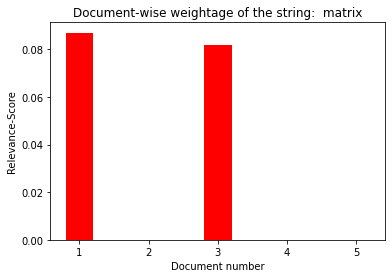



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
1
Enter keyword you want to search

matrix svd
Loading your search results...
4
k 4
q [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
[[ 0.     0.     0.    -0.     0.536]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.     0.     0.     0.402 -0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.078  0.     0.073  0.     0.   ]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.     0.     0.     0.229  0.305]
 [ 0.073  0.     0.068  0.     0.   ]
 [ 0.     0.322  0.     0.     0.   ]
 [ 0.     0.  

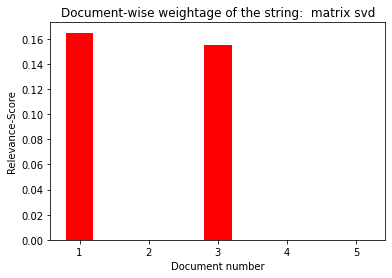



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit


KeyboardInterrupt: ignored

In [ ]:
while(1):
    print("Please choose an option:\n"
    + "1: Search keywords \n"
    + "2: View Documents \n"
    + "3: Exit")
    opt = int(input())
    if(opt == 1):
        print("Enter keyword you want to search\n")
        s = input()
        print("Loading your search results...")
        search(s)
        print("\n")
    elif (opt == 2):
        print("Enter Document number:\n\n")
        doc_n = int(input())

        if(doc_n>len(store)):
            print("There are only ",len(store)," documents")
            continue
        print(store[doc_n - 1])
        print("\n")
    elif( opt == 3):
        print("THANK YOU")
        exit()
    else:
        print("Enter valid input. ")